In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [16]:
# 한글 폰트 경로 설정 (로컬 폰트 파일 경로로 수정)
font_path = "C:/Windows/Fonts/malgun.ttf"

# 한글 폰트를 사용하기 위한 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [17]:
# 파일 접두어 정의
file_prefixes = ["국가애도기간", "대통령사과", "경찰책임", "정부책임", "유가족협의회", "특별법"]

# 디렉토리 경로
directory_path = "./6_emotion/"

dfs=[]

# 각 파일 접두어에 대해 반복
for prefix in file_prefixes:
    # 파일 경로 정의
    file_path = directory_path + f"{prefix}_emotion.xlsx"

    df = pd.read_excel(file_path)
    
    df['file_prefix'] = prefix
        
    dfs.append(df)

## 개별 파일에 대한 시각화

### 개별 파일의 감정 클래스 비율 시각화

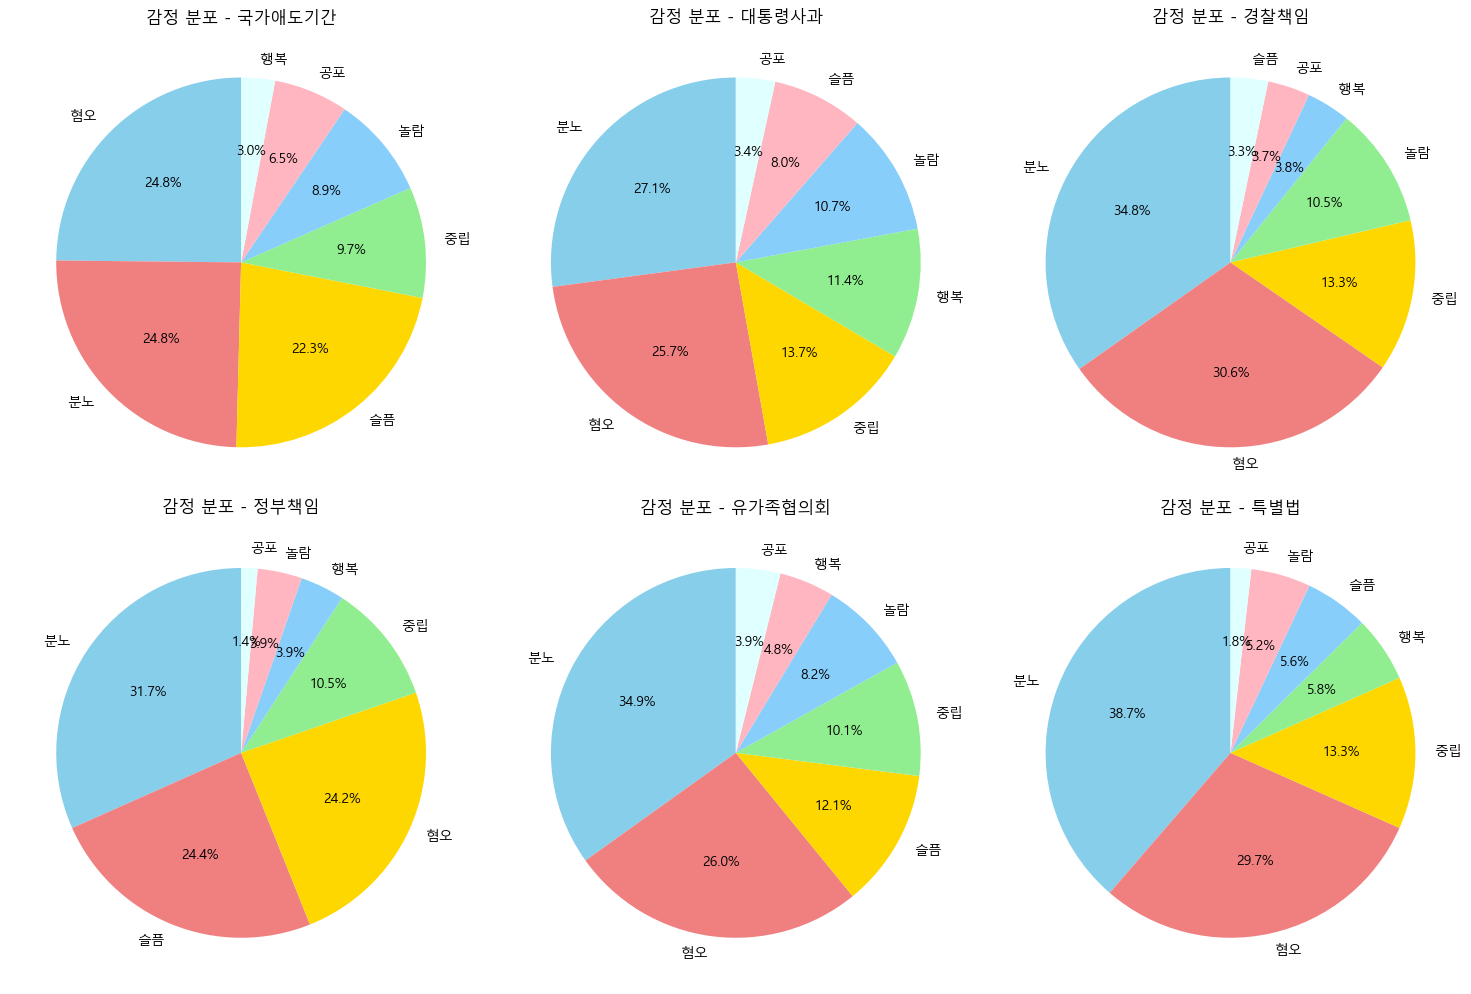

In [20]:
#len(dfs)는 3으로 나눕니다.
num_rows = len(dfs) // 3
num_cols = 3

# 전체 그림의 크기를 설정합니다.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# 각 DataFrame에 대해 반복합니다.
for i, df in enumerate(dfs):
    emotion_counts = df['Emotion'].value_counts()
    
    # 서브플롯을 위한 행 및 열 인덱스를 계산합니다.
    row_index = i // num_cols
    col_index = i % num_cols
    
    # 행이 여러 개인 경우 해당 위치의 서브플롯을 선택합니다.
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    
    # Pie 차트를 그립니다.
    ax.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'gold', 'lightgreen', 'lightskyblue', 'lightpink', 'lightcyan'])
    
    # 서브플롯의 제목을 설정합니다.
    ax.set_title(f'감정 분포 - {file_prefixes[i]}')

# 서브플롯 간의 겹침을 방지하기 위해 레이아웃을 조절합니다.
plt.tight_layout()
plt.show()

### 좋아요 수를 고려한 감정 클래스 비율 시각화

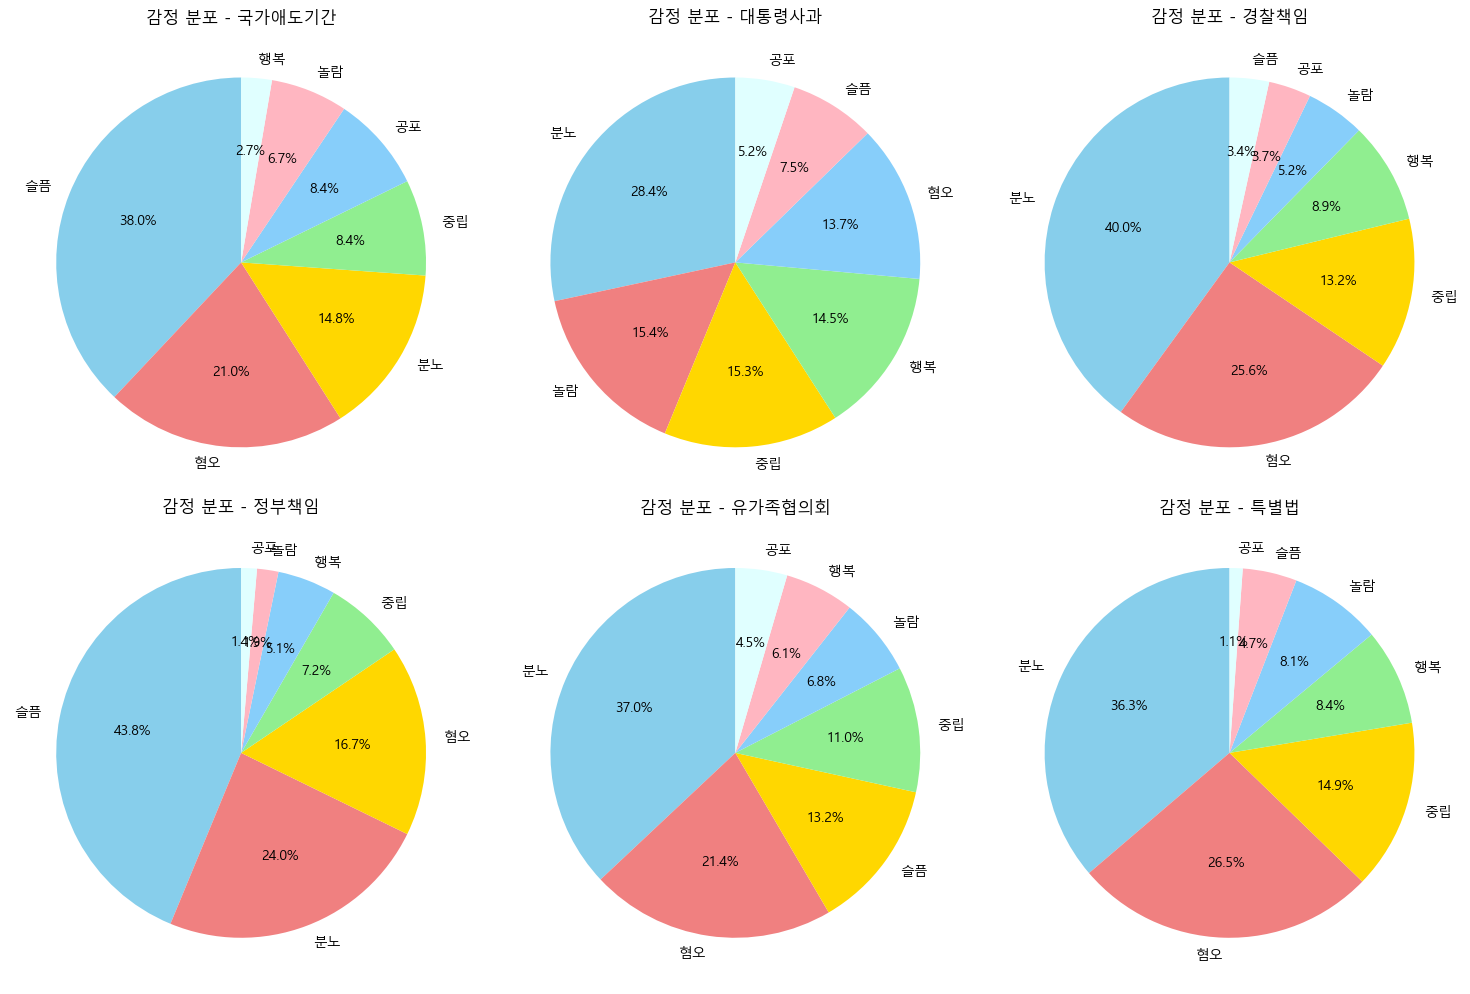

In [22]:
# len(dfs)는 3으로 나눕니다.
num_rows = len(dfs) // 3
num_cols = 3

# 전체 그림의 크기를 설정합니다.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# 각 DataFrame에 대해 반복합니다.
for i, df in enumerate(dfs):
    emotion_likes = df.groupby('Emotion')['Likes'].sum().sort_values(ascending=False)
    
    # 서브플롯을 위한 행 및 열 인덱스를 계산합니다.
    row_index = i // num_cols
    col_index = i % num_cols
    
    # 행이 여러 개인 경우 해당 위치의 서브플롯을 선택합니다.
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    
    # Pie 차트를 그립니다.
    ax.pie(emotion_likes, labels=emotion_likes.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'gold', 'lightgreen', 'lightskyblue', 'lightpink', 'lightcyan'])
    
    # 서브플롯의 제목을 설정합니다.
    ax.set_title(f'감정 분포 - {file_prefixes[i]}')

# 서브플롯 간의 겹침을 방지하기 위해 레이아웃을 조절합니다.
plt.tight_layout()
plt.show()


## 전체 파일에 대한 시각화

In [10]:
merged_df = pd.concat(dfs, ignore_index=True)

In [11]:
merged_df.head()

,Unnamed: 0,owner,title,Username,Comment,Likes,Times,Emotion,file_prefix
0,0,YTN,"[속보] 정부 ""5일까지 국가 애도기간"".. 정치권도 위로와 애도 표해 / 이태원...",@user-ss5hd8ou7o,어처구니없는사건 하루종일가슴이먹먹하네요 너무도아까운젊은이들 비통하네요 고인의명복을빕니다,2.0,2022. 10. 29,슬픔,국가애도기간
1,1,YTN,"[속보] 정부 ""5일까지 국가 애도기간"".. 정치권도 위로와 애도 표해 / 이태원...",@topcule3830,국민들이 바라지도 않은 본인 용와대 출근에는 경찰 인력을 700명이나 동원하면서 수...,37.0,2022. 10. 29,분노,국가애도기간
2,2,YTN,"[속보] 정부 ""5일까지 국가 애도기간"".. 정치권도 위로와 애도 표해 / 이태원...",@user-zv6ty8rw2i,국가를 위해서 몸바쳐 돌아가신분들은 아닙니다. 국가애도기간이라니…정말 어이가 없네요...,49.0,2022. 10. 29,슬픔,국가애도기간
3,3,YTN,"[속보] 정부 ""5일까지 국가 애도기간"".. 정치권도 위로와 애도 표해 / 이태원...",@Akfg-ez7fq,"사전에 통행유도등 통제가\n제대로 이루어 졌다면 \n단,한사람의 생명도 잃지\n않았...",30.0,2022. 10. 29,행복,국가애도기간
4,4,YTN,"[속보] 정부 ""5일까지 국가 애도기간"".. 정치권도 위로와 애도 표해 / 이태원...",@yokool6805,"애도기간이 일주일이나 된다면 순국열사 수준보다 더하니, 책임자 사퇴시켜라. 국민세금...",21.0,2022. 10. 29,분노,국가애도기간


### 전체 파일의 감정 클래스 비율 시각화

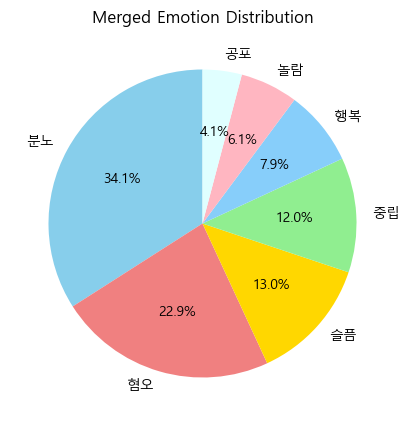

In [9]:
merged_emotion_counts = merged_df.groupby('Emotion')['Likes'].sum().sort_values(ascending=False)

plt.figure(figsize=(5, 5))
plt.pie(merged_emotion_counts, labels=merged_emotion_counts.index, autopct='%1.1f%%', startangle=90, colors = ['skyblue', 'lightcoral', 'gold', 'lightgreen', 'lightskyblue', 'lightpink', 'lightcyan'])
plt.title(f'전체 문서 감정 분석 - 좋아요o')

plt.show()

### 시간에 따른 감정 클래스 비율 변화


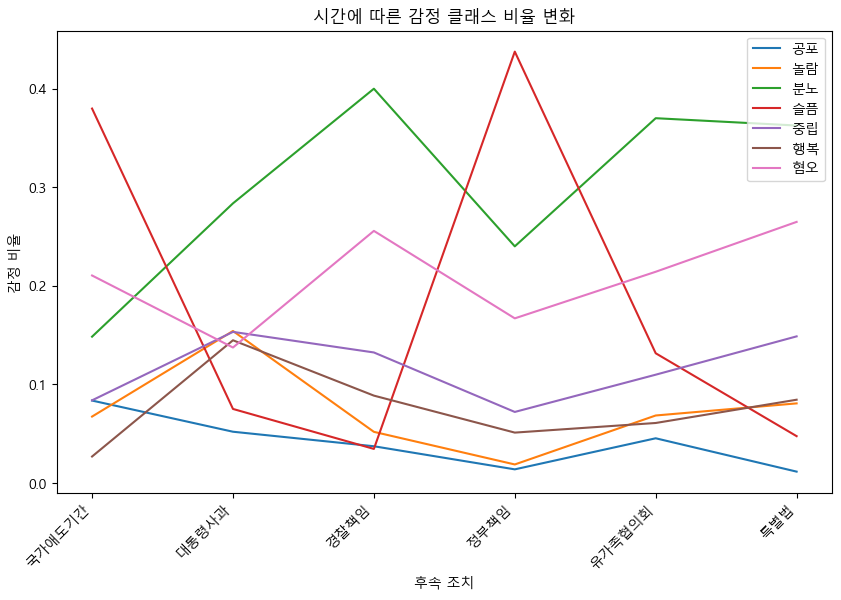

In [59]:
# Emotion 비율 계산
emotion_counts = merged_df.groupby(['file_prefix', 'Emotion'])['Likes'].sum().unstack(fill_value=0)

emotion_ratios = emotion_counts.div(emotion_counts.sum(axis=1), axis=0)

emotion_ratios = emotion_ratios.loc[file_prefixes]

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# 각 Emotion에 대한 선 그래프 그리기
for emotion in emotion_ratios.columns:
    ax.plot(emotion_ratios.index, emotion_ratios[emotion], label=emotion)

ax.set_xticks(emotion_ratios.index)
ax.set_xticklabels(file_prefixes, rotation=45, ha='right')

# 그래프 꾸미기
ax.set_xlabel('후속 조치')
ax.set_ylabel('감정 비율')
ax.legend(loc='upper right')
ax.set_title('시간에 따른 감정 클래스 비율 변화')

# 그래프 표시
plt.show()


In [61]:
# 파일 접두어 정의
file_prefixes = ["국가애도기간", "대통령사과", "경찰책임", "정부책임", "유가족협의회", "특별법"]

# 디렉토리 경로
directory_path = "./7_topic_3/"

topic_dfs3=[]

# 각 파일 접두어에 대해 반복
for prefix in file_prefixes:
    # 파일 경로 정의
    file_path = directory_path + f"{prefix}_topic.xlsx"

    df = pd.read_excel(file_path)
    # 'Noun' 열을 인덱스로 설정
    df.set_index('Unnamed: 0', inplace=True)
        
    topic_dfs3.append(df)
    
topic_dfs3[0]

,슬픔,분노,행복,혐오,중립,놀람,공포
Unnamed: 0,,,,,,,
애도,5060,1345,26,1332,862,443,510
국가,5040,860,85,805,772,463,479
기간,3303,946,16,958,815,454,476
사고,676,411,4,2543,171,297,83
사람,2551,279,30,734,43,3,46
나라,706,281,73,398,13,10,101
고인,1221,49,0,259,43,0,1
명복,1029,63,0,70,39,0,1
참사,489,190,1,27,337,77,3


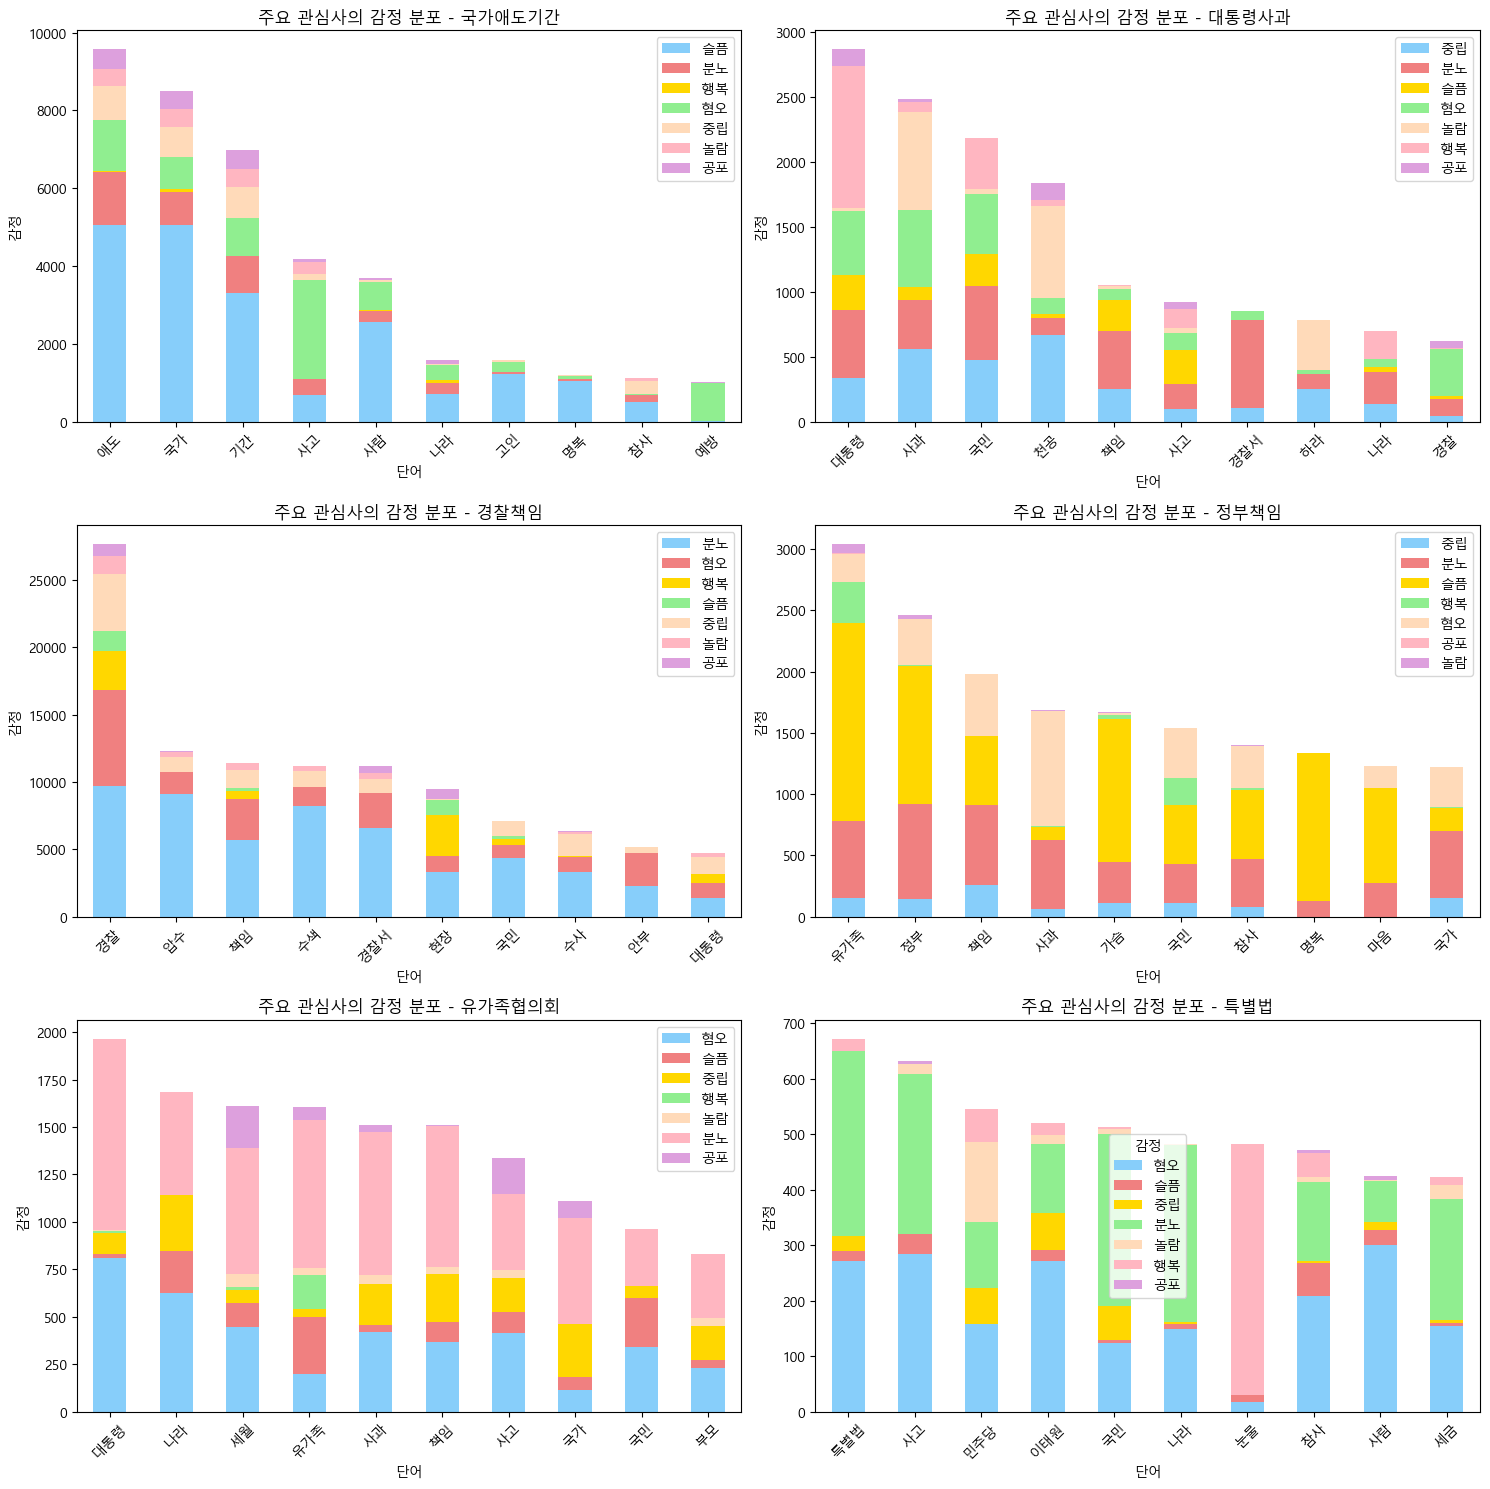

In [75]:
# len(dfs)는 3으로 나눕니다.
num_rows = len(dfs) // 2
num_cols = 2

colors = ['lightskyblue', 'lightcoral', 'gold', 'lightgreen','peachpuff' , 'lightpink', 'plum']

# 전체 그림의 크기를 설정합니다.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# 각 DataFrame에 대해 반복합니다.
for i, df in enumerate(topic_dfs3):
    
    # 서브플롯을 위한 행 및 열 인덱스를 계산합니다.
    row_index = i // num_cols
    col_index = i % num_cols
    
    # 행이 여러 개인 경우 해당 위치의 서브플롯을 선택합니다.
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    
    df.plot(kind='bar', stacked=True, color = colors, ax=ax)
    
    # 서브플롯의 제목을 설정합니다.
    ax.set_title(f'주요 관심사의 감정 분포 - {file_prefixes[i]}')
    ax.set_xlabel('단어')
    ax.set_ylabel('감정')
    ax.tick_params(axis='x', rotation=45)


# 범례 추가
plt.legend(title='감정')

# 서브플롯 간의 겹침을 방지하기 위해 레이아웃을 조절합니다.
plt.tight_layout()
plt.show()
